## Compare Machine Learning Algorithms Consistently



The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm
to be evaluated on a consistent test harness. In the example below six different classification
algorithms are compared on a single dataset:
 
 - Logistic Regression
 - Linear Discriminant Analysis
 - k-Nearest Neighbors
 - Classi cation and Regression Trees
 - Naive Bayes
 - Support Vector Machines

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [1]:
# Load libraries
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

LR: 0.776042 (0.045054)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.686364 (0.056295)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


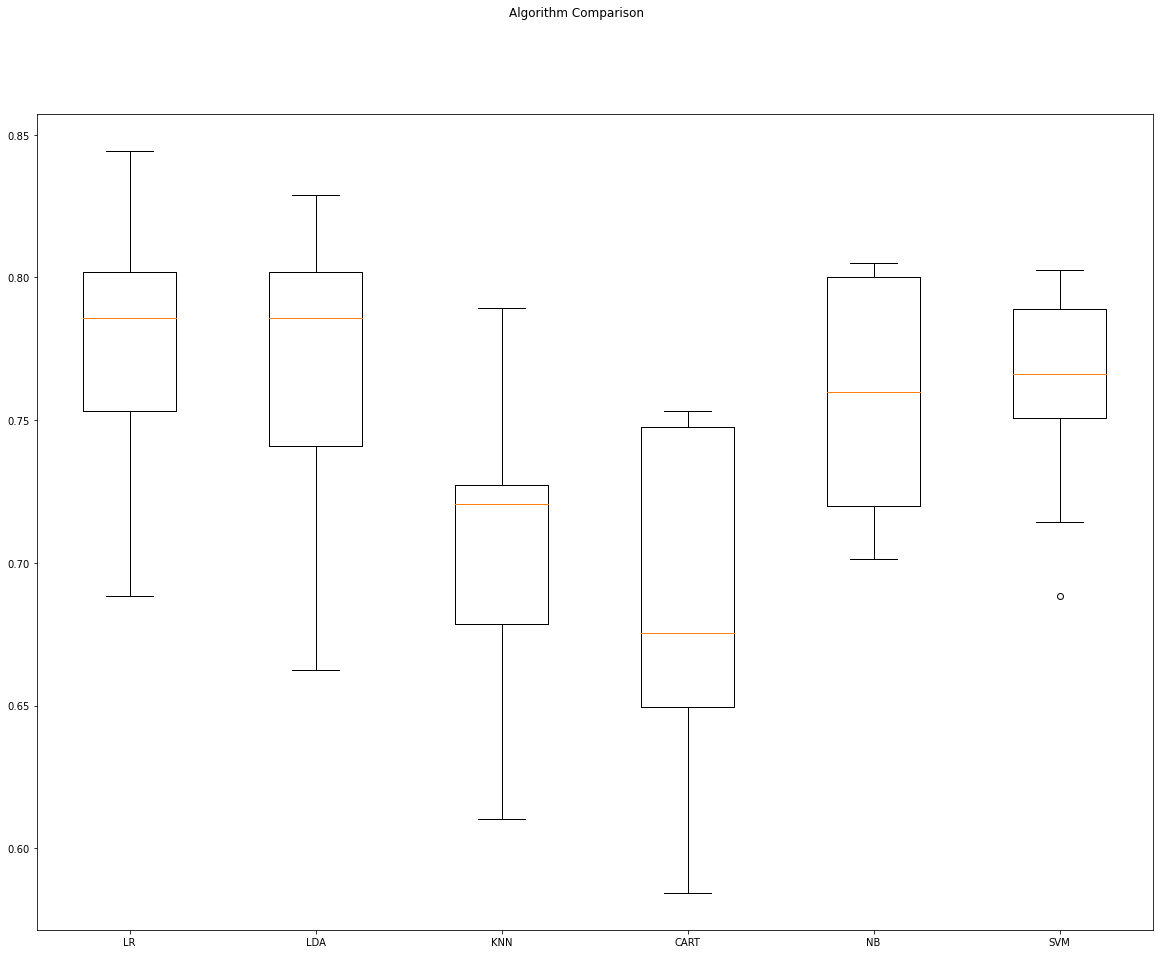

In [2]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Running the example provides a list of each algorithm short name, the mean accuracy and
the standard deviation accuracy. The example also provides a box and whisker plot showing the spread of the accuracy scores
across each cross validation fold for each algorithm. From these results, it would suggest that both logistic regression and linear discriminant
analysis are perhaps worthy of further study on this problem.